# Lightcurve (+ Transit) Creation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
class LightCurve(object):

    def __init__(self, numticks = 100, depth = 0, duration = 0, noise = .001):
        """
        Light Curve with transit details for one period

        Args:
        numticks (integer): number of timesteps in one period
        depth (0 < float < 1.0): depth of simulated transit
        duration (0 < float < 1.0): time length of simulated transit
        noise (float): normalized noise of flux
        location (0 < float < 1.0): central location of transit
        rawflux (array of floats): normalized flux of light curve

        """
        self.length = numticks
        if depth == 0:
            self.depth = np.random.uniform(.01,.20)
        else:
            self.depth = depth
        if duration == 0:
            self.duration = np.random.randint(.02 * self.length, .15 * self.length)
        else:
            self.duration = duration * self.length
        self.noise = noise
        self.location = np.random.randint(0,self.length)
        self.rawflux = np.ones(self.length) + np.random.normal(loc = 0, scale = self.noise, size = self.length)
    
    def add_transit(self):
        """ 
        Subtracts transit from the flux and plots the resulting lightcurve
        """
        lowerbound = int(self.location - self.duration/2)
        upperbound = int(self.location + self.duration/2)
        #print("FIRST")
        #print(lowerbound,upperbound,self.location)
        if lowerbound < 0:
            ub = self.length + lowerbound
            lb = upperbound
            self.flux[0:lb] = self.rawflux - self.depth
            self.flux[ub:self.length] = self.rawflux - self.depth
            overflow_flag = True
        elif upperbound > self.length:
            lb = int(upperbound - self.length)
            ub = int(lowerbound)
            self.flux[0:lb] = self.rawflux - self.depth
            self.flux[ub:self.length] = self.rawflux - self.depth
            overflow_flag = True
        else:
            ub = int(upperbound)
            lb = int(lowerbound) 
            self.flux[lb:ub] = self.rawflux - self.depth
            overflow_flag = False
        #print("FINAL")
        #print(lb,ub,self.location)
        if overflow_flag == True:
            plt.figure()
            plt.plot(np.arange(0,self.length)/self.length,self.flux, label = "Lightcurve", color = "deepskyblue")
            plt.plot(np.arange(0,lb)/self.length,self.flux[0:lb], label = "Transit", color = "navy")
            plt.plot(np.arange(ub,self.length)/self.length, self.flux[ub:self.length], color = "navy")
            plt.xlabel("Period")
            plt.ylabel("Normalized Flux")
            plt.title("Generated Light Curve")
            plt.legend()            
        else:
            plt.figure()
            plt.plot(np.arange(0,self.length)/self.length,self.flux, label = "Lightcurve", color = "deepskyblue")
            plt.plot(np.arange(lb,ub)/self.length,self.flux[lb:ub], label = "Transit", color = "navy")
            plt.xlabel("Period")
            plt.ylabel("Normalized Flux")
            plt.title("Generated Light Curve")
            plt.legend()


In [138]:
class LightCurveMultiple(object):

    def __init__(self, ticksinper = 100, depth = 0, duration = 0, noise = .001, numper = 1):
        """
        Light Curve with transit details for one period

        Args:
        ticksinper (int): number of timesteps in one period
        length (integer): number of total timesteps
        depth (0 < float < 1.0): depth of simulated transit
        duration (0 < float < 1.0): time length of simulated transit
        noise (float): normalized noise of flux
        location (0 < float < 1.0): central location of transit
        flux (array of floats): normalized flux of light curve
        numper (int): number of periods

        """
        self.ticksinper = ticksinper
        self.length = self.ticksinper * numper
        if depth == 0:
            self.depth = np.random.uniform(.01,.20)
        else:
            self.depth = np.random.normal(loc = depth, scale = .03, size = 1)
        if duration == 0:
            self.duration = np.random.randint(.02 * ticksinper, .15 * ticksinper)
        else:
            self.duration = duration * ticksinper
        self.noise = noise
        self.location = np.random.randint(0,ticksinper)
        self.flux = np.ones(self.length) + np.random.normal(loc = 0, scale = self.noise, size = self.length)
    
    def new_transit(self):
        self.depth = np.random.normal(loc=self.depth, scale = 0.01, size = 1)
        self.location = self.location + self.ticksinper
        
    def add_transit(self):
        """ 
        Subtracts transit from the flux and plots the resulting lightcurve
        """
        lowerbound = int(self.location - self.duration/2)
        upperbound = int(self.location + self.duration/2)
        #print("FIRST")
        #print(lowerbound,upperbound,self.location)
        if lowerbound < 0:
            ub = self.length + lowerbound
            lb = upperbound
            self.flux[0:lb] -= self.depth
            self.flux[ub:self.length] -= self.depth
            overflow_flag = True
        elif upperbound > self.length:
            lb = int(upperbound - self.length)
            ub = int(lowerbound)
            self.flux[0:lb] -= self.depth
            self.flux[ub:self.length] -= self.depth
            overflow_flag = True
        else:
            ub = int(upperbound)
            lb = int(lowerbound) 
            self.flux[lb:ub] -= self.depth
            overflow_flag = False
        #print("FINAL")
        #print(lb,ub,self.location)
        if overflow_flag == True:
            #plt.figure()
            plt.plot(np.arange(0,self.length)/self.ticksinper,self.flux, label = "Lightcurve", color = "deepskyblue")
            plt.plot(np.arange(0,lb)/self.ticksinper,self.flux[0:lb], label = "Transit", color = "navy", zorder = 3)
            plt.plot(np.arange(ub,self.ticksinper)/self.ticksinper, self.flux[ub:self.ticksinper], color = "navy", zorder = 3)
            plt.xlabel("Period")
            plt.ylabel("Normalized Flux")
            plt.title("Generated Light Curve")
            plt.legend()            
        else:
            #plt.figure()
            plt.plot(np.arange(0,self.length)/self.ticksinper,self.flux, label = "Lightcurve", color = "deepskyblue")
            plt.plot(np.arange(lb,ub)/self.ticksinper,self.flux[lb:ub], label = "Transit", color = "navy", zorder = 3)
            plt.xlabel("Period")
            plt.ylabel("Normalized Flux")
            plt.title("Generated Light Curve")
            plt.legend()


In [111]:
LightCurve()

In [112]:
transit1 = LightCurve(numticks = 100, depth = .10, duration = .3,)

AttributeError: 'LightCurve' object has no attribute 'new_transit'

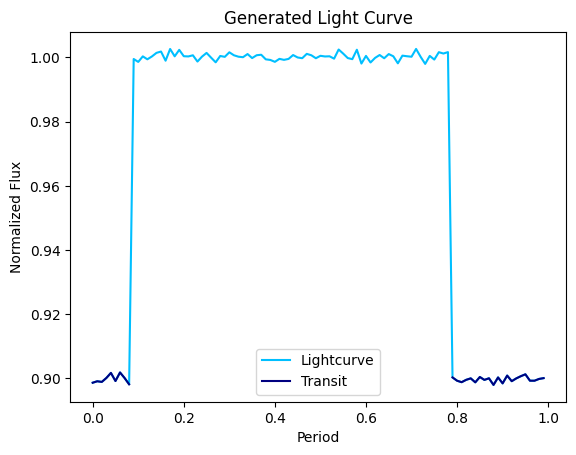

In [113]:
transit1.add_transit()
transit1.new_transit()

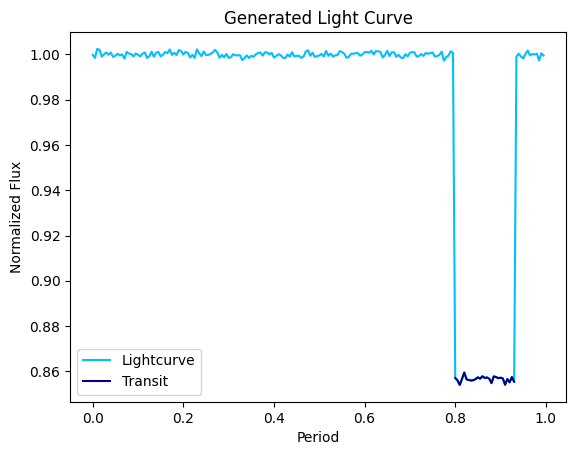

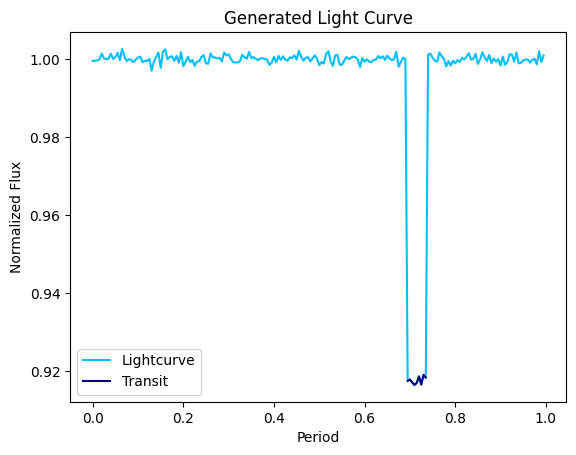

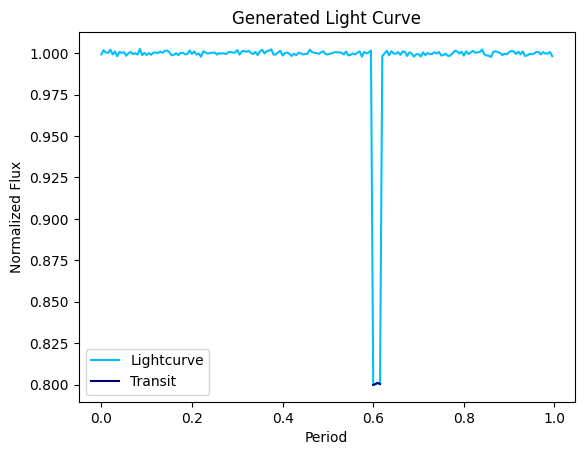

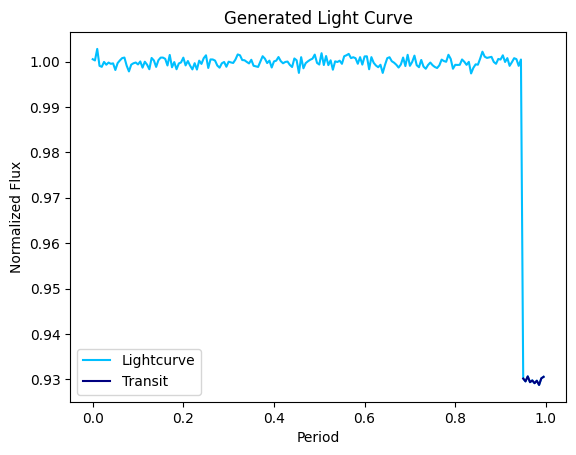

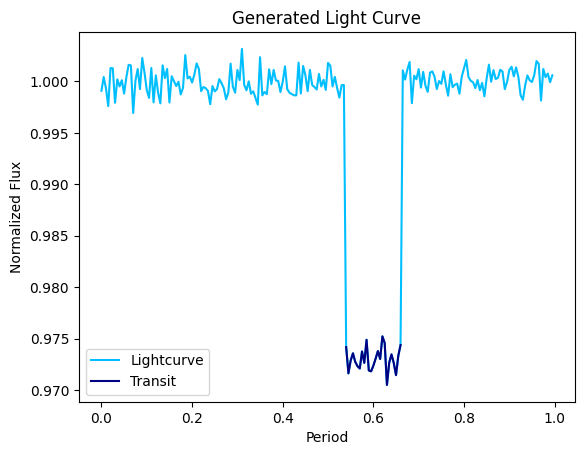

In [114]:
for i in np.arange(0,5):
    transit = LightCurve(numticks=200)
    transit.add_transit()

In [155]:
transits = LightCurveMultiple(ticksinper = 100, depth = .10, duration = .3, numper = 3)

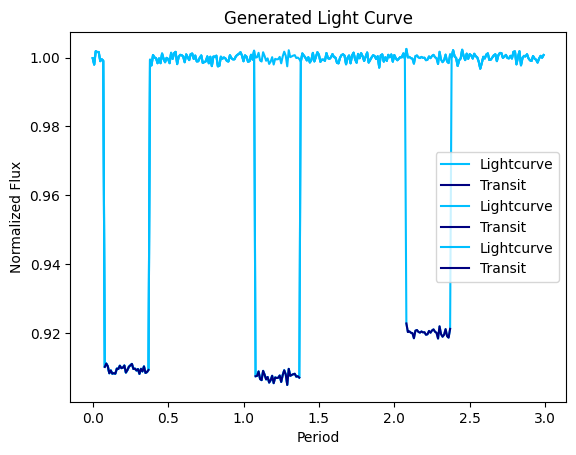

In [156]:
transits.add_transit()
transits.new_transit()
transits.add_transit()
transits.new_transit()
transits.add_transit()
